[nltk_data] Downloading package punkt to C:\Users\Edward
[nltk_data]     Rosales\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Generando embeddings...

TF-IDF Embeddings shape: (8, 34)


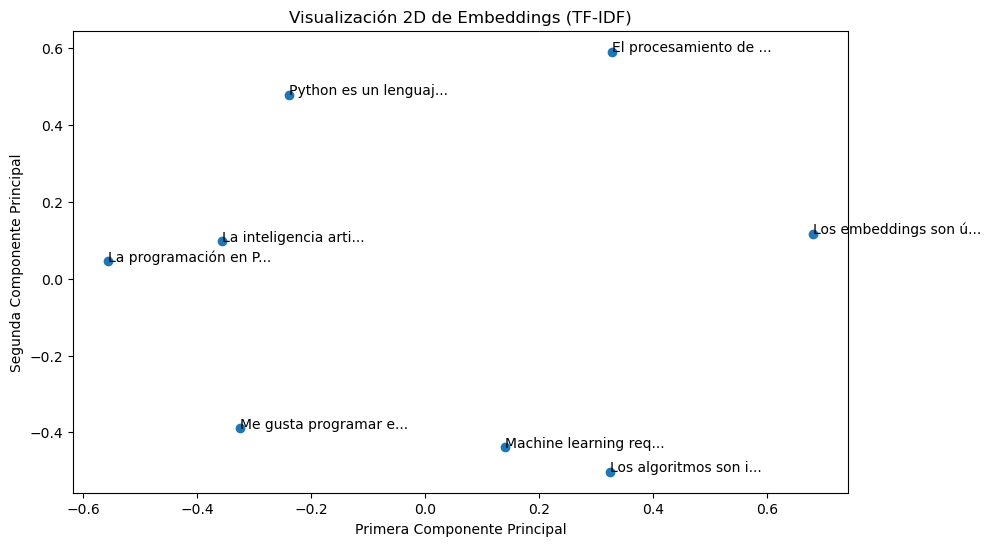


Matriz de similitud entre textos:

Similitud entre:
'Me gusta programar en Python' y
'Python es un lenguaje de programación versátil':
0.118

Similitud entre:
'Me gusta programar en Python' y
'La programación en Python es divertida':
0.265

Similitud entre:
'Me gusta programar en Python' y
'Los algoritmos son importantes en computación':
0.117

Similitud entre:
'La inteligencia artificial es fascinante' y
'La programación en Python es divertida':
0.278

Similitud entre:
'Los embeddings son útiles para el procesamiento de texto' y
'Los algoritmos son importantes en computación':
0.234

Similitud entre:
'Los embeddings son útiles para el procesamiento de texto' y
'El procesamiento de lenguaje natural es complejo':
0.317

Similitud entre:
'Python es un lenguaje de programación versátil' y
'La programación en Python es divertida':
0.376

Similitud entre:
'Python es un lenguaje de programación versátil' y
'El procesamiento de lenguaje natural es complejo':
0.329

Similitud entre:
'La progr

In [3]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Descargar datos necesarios de NLTK
nltk.download('punkt')

class SimpleEmbeddingGenerator:
    def __init__(self):
        """Inicializa el vectorizador TF-IDF"""
        self.tfidf = TfidfVectorizer()

    def preprocess_text(self, texts):
        """Preprocesa una lista de textos"""
        # Tokenización y conversión a minúsculas
        tokenized_texts = [word_tokenize(text.lower()) for text in texts]
        return tokenized_texts

    def generate_tfidf_embeddings(self, texts):
        """Genera embeddings usando TF-IDF"""
        tfidf_matrix = self.tfidf.fit_transform(texts)
        return tfidf_matrix.toarray()

def visualize_embeddings(embeddings, texts, title):
    """Visualiza los embeddings en 2D usando PCA"""
    # Reducir dimensionalidad a 2D
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Crear visualización
    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
    
    # Agregar etiquetas
    for i, text in enumerate(texts):
        plt.annotate(text[:20] + "...", (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    
    plt.title(f'Visualización 2D de Embeddings ({title})')
    plt.xlabel('Primera Componente Principal')
    plt.ylabel('Segunda Componente Principal')
    plt.show()

def main():
    # Ejemplo de textos
    texts = [
        "Me gusta programar en Python",
        "La inteligencia artificial es fascinante",
        "Los embeddings son útiles para el procesamiento de texto",
        "Python es un lenguaje de programación versátil",
        "Machine learning requiere muchos datos",
        "La programación en Python es divertida",
        "Los algoritmos son importantes en computación",
        "El procesamiento de lenguaje natural es complejo"
    ]
    
    # Crear generador de embeddings
    generator = SimpleEmbeddingGenerator()
    
    print("Generando embeddings...")
    
    # Generar embeddings usando TF-IDF
    tfidf_embeddings = generator.generate_tfidf_embeddings(texts)
    print("\nTF-IDF Embeddings shape:", tfidf_embeddings.shape)
    
    # Visualizar embeddings
    visualize_embeddings(tfidf_embeddings, texts, "TF-IDF")
    
    # Mostrar ejemplo de similitud entre textos
    from sklearn.metrics.pairwise import cosine_similarity
    similarity_matrix = cosine_similarity(tfidf_embeddings)
    
    print("\nMatriz de similitud entre textos:")
    for i in range(len(texts)):
        for j in range(i+1, len(texts)):
            similarity = similarity_matrix[i][j]
            if similarity > 0.1:  # Solo mostrar similitudes significativas
                print(f"\nSimilitud entre:\n'{texts[i]}' y\n'{texts[j]}':\n{similarity:.3f}")

if __name__ == "__main__":
    main()